<a href="https://colab.research.google.com/github/Rmkh77/Cifar_10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

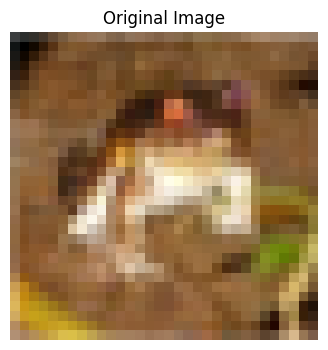

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Display an original image from the dataset
plt.figure(figsize=(4, 4))
plt.imshow(train_images[0])
plt.title('Original Image')
plt.axis('off')
plt.show()

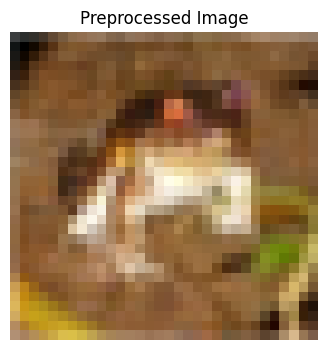

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the preprocessed image
plt.figure(figsize=(4, 4))
plt.imshow(train_images[0])
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [4]:
# Apply one-hot encoding to the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [5]:
# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    rescale=1./255
)

In [6]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the ImageDataGenerator on the training data
datagen.fit(train_images)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=128),
                    epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
391/391 [==============================] - 109s 273ms/step - loss: 2.3004 - accuracy: 0.1022 - val_loss: 111.1041 - val_accuracy: 0.1000
Epoch 2/20
391/391 [==============================] - 100s 256ms/step - loss: 2.1868 - accuracy: 0.1796 - val_loss: 181.9948 - val_accuracy: 0.1095
Epoch 3/20
391/391 [==============================] - 92s 235ms/step - loss: 2.1194 - accuracy: 0.2048 - val_loss: 149.3477 - val_accuracy: 0.1180
Epoch 4/20
391/391 [==============================] - 91s 232ms/step - loss: 2.0836 - accuracy: 0.2225 - val_loss: 152.1465 - val_accuracy: 0.1075
Epoch 5/20
391/391 [==============================] - 93s 238ms/step - loss: 2.0736 - accuracy: 0.2257 - val_loss: 141.4376 - val_accuracy: 0.1106
Epoch 6/20
391/391 [==============================] - 88s 225ms/step - loss: 2.0670 - accuracy: 0.2316 - val_loss: 159.9275 - val_accuracy: 0.1114
Epoch 7/20
391/391 [==============================] - 90s 231ms/step - loss: 2.0560 - accuracy: 0.2382 - val_loss: 1

313/313 - 4s - loss: 114.1700 - accuracy: 0.1912 - 4s/epoch - 14ms/step

Test accuracy: 0.19120000302791595


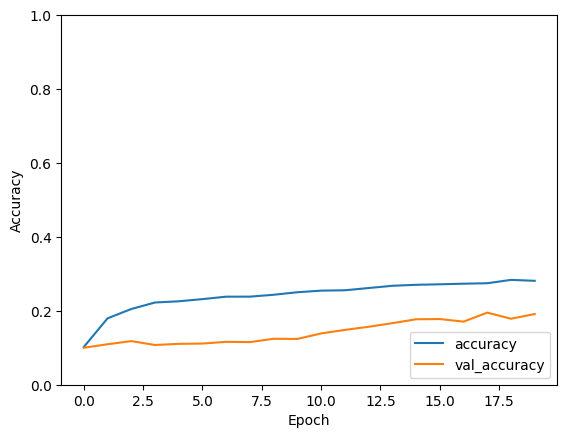

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


In [12]:
# Example prediction
example_index = 0
predicted_label = np.argmax(predictions[example_index])
true_label = test_labels[example_index][0]

print("Example prediction:", predicted_label)
print("True label:", true_label)

Example prediction: 2
True label: 0.0


In [13]:
# Calculate accuracy
predicted_labels = np.argmax(predictions, axis=1)
correct_predictions = (predicted_labels == test_labels[:, 0])
accuracy = np.mean(correct_predictions)

print('Test Accuracy:', accuracy)

Test Accuracy: 0.2954


In [14]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/project_hbic/cifar_10/model.h5"

model.save(model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: /content/drive/MyDrive/project_hbic/cifar_10/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Function to load and preprocess images
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

1/1 [==============================] - 0s 223ms/step


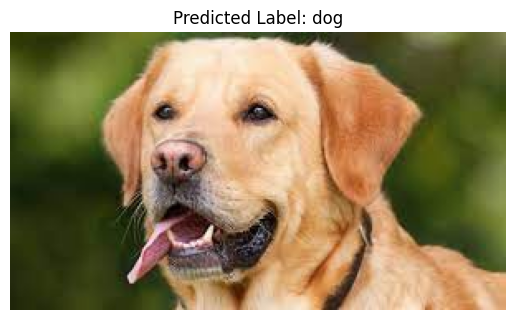

In [22]:
import tensorflow as tf

# Example image paths
image_paths = ["/content/drive/MyDrive/project_hbic/cifar_10/dog.jpg"]

# Load the trained model
model = load_model("/content/drive/MyDrive/project_hbic/cifar_10/model.h5")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Predict classes for new samples
for image_path in image_paths:
    # Preprocess the image
    img_array = tf.keras.preprocessing.image.img_to_array(image.load_img(image_path, target_size=(32, 32))) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)

    # Get predicted class label
    predicted_label = np.argmax(predictions)
    predicted_label = class_names[predicted_label]

    # Display the input image
    plt.figure()
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title('Predicted Label: {}'.format(predicted_label))
    plt.axis('off')
    plt.show()